In [242]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
data = pandas.read_csv('COVID-19PL.csv', header=0, sep=';')
data

,Data,Nowe przypadki,Nowe zgony,Nowe wyzdrowienia
0,3.03,+ 0,0,0
1,4.03,+ 1,0,0
2,5.03,+ 0,0,0
3,6.03,+ 4,0,0
4,7.03,+ 1,0,0
...,...,...,...,...
242,31.10,+ 21897,280,5556
243,1.11,+ 17171,152,6315
244,2.11,+ 15578,92,7818
245,3.11,+ 19364,227,5573


In [244]:
data.shape

(247, 4)

In [245]:
data.head()

,Data,Nowe przypadki,Nowe zgony,Nowe wyzdrowienia
0,3.03,+ 0,0,0
1,4.03,+ 1,0,0
2,5.03,+ 0,0,0
3,6.03,+ 4,0,0
4,7.03,+ 1,0,0


In [246]:
# Changing/fixing column 'Nowe przypadki' to be number not string
data['Nowe przypadki'] = data['Nowe przypadki'].astype(str).str.replace("+","").astype(int)
data

,Data,Nowe przypadki,Nowe zgony,Nowe wyzdrowienia
0,3.03,0,0,0
1,4.03,1,0,0
2,5.03,0,0,0
3,6.03,4,0,0
4,7.03,1,0,0
...,...,...,...,...
242,31.10,21897,280,5556
243,1.11,17171,152,6315
244,2.11,15578,92,7818
245,3.11,19364,227,5573


In [247]:
# Adding new columns - "Sum of new cases", "Sum of deaths", "Sum of recoveries" (new columns will be marked with #)
data['#Sum_of_new_cases'] = data['Nowe przypadki'].cumsum()
data['#Sum_of_deaths'] = data['Nowe zgony'].cumsum()
data['#Sum_of_recoveries'] = data['Nowe wyzdrowienia'].cumsum()
data

,Data,Nowe przypadki,Nowe zgony,Nowe wyzdrowienia,#Sum_of_new_cases,#Sum_of_deaths,#Sum_of_recoveries
0,3.03,0,0,0,0,0,0
1,4.03,1,0,0,1,0,0
2,5.03,0,0,0,1,0,0
3,6.03,4,0,0,5,0,0
4,7.03,1,0,0,6,0,0
...,...,...,...,...,...,...,...
242,31.10,21897,280,5556,362731,5631,140280
243,1.11,17171,152,6315,379902,5783,146595
244,2.11,15578,92,7818,395480,5875,154413
245,3.11,19364,227,5573,414844,6102,159986


In [248]:
# Adding column for current active cases
data['#Active_cases'] = data['#Sum_of_new_cases'] - data['#Sum_of_deaths'] - data['#Sum_of_recoveries']
# Adding column for difference of current day and day before
data['#Diff_of_new_cases'] = data['Nowe przypadki'].diff()
data

,Data,Nowe przypadki,Nowe zgony,Nowe wyzdrowienia,#Sum_of_new_cases,#Sum_of_deaths,#Sum_of_recoveries,#Active_cases,#Diff_of_new_cases
0,3.03,0,0,0,0,0,0,0,NaN
1,4.03,1,0,0,1,0,0,1,1.0
2,5.03,0,0,0,1,0,0,1,-1.0
3,6.03,4,0,0,5,0,0,5,4.0
4,7.03,1,0,0,6,0,0,6,-3.0
...,...,...,...,...,...,...,...,...,...
242,31.10,21897,280,5556,362731,5631,140280,216820,268.0
243,1.11,17171,152,6315,379902,5783,146595,227524,-4726.0
244,2.11,15578,92,7818,395480,5875,154413,235192,-1593.0
245,3.11,19364,227,5573,414844,6102,159986,248756,3786.0


In [249]:
# Adding new "rolling" columns (this columns will be marked with ROLL)
# Mean of last 5 rows of Diff_of_new_cases
data['ROLL_mean_Diff'] = data['#Diff_of_new_cases'].rolling(window=5, min_periods=0).mean()
data

,Data,Nowe przypadki,Nowe zgony,Nowe wyzdrowienia,#Sum_of_new_cases,#Sum_of_deaths,#Sum_of_recoveries,#Active_cases,#Diff_of_new_cases,ROLL_mean_Diff
0,3.03,0,0,0,0,0,0,0,NaN,NaN
1,4.03,1,0,0,1,0,0,1,1.0,1.000000
2,5.03,0,0,0,1,0,0,1,-1.0,0.000000
3,6.03,4,0,0,5,0,0,5,4.0,1.333333
4,7.03,1,0,0,6,0,0,6,-3.0,0.250000
...,...,...,...,...,...,...,...,...,...,...
242,31.10,21897,280,5556,362731,5631,140280,216820,268.0,2331.200000
243,1.11,17171,152,6315,379902,5783,146595,227524,-4726.0,174.200000
244,2.11,15578,92,7818,395480,5875,154413,235192,-1593.0,-648.400000
245,3.11,19364,227,5573,414844,6102,159986,248756,3786.0,-158.400000


In [250]:
# Fixing index column for plots
data['Data'] = pandas.to_datetime((data['Data'].astype(str) + '.20')
                                        .str.replace(".","-")
                                        .str.replace("-1-","-10-")
                                        .apply(lambda i: '{0:0>8}'.format(i)), format='%d-%m-%y')
data

,Data,Nowe przypadki,Nowe zgony,Nowe wyzdrowienia,#Sum_of_new_cases,#Sum_of_deaths,#Sum_of_recoveries,#Active_cases,#Diff_of_new_cases,ROLL_mean_Diff
0,2020-03-03,0,0,0,0,0,0,0,NaN,NaN
1,2020-03-04,1,0,0,1,0,0,1,1.0,1.000000
2,2020-03-05,0,0,0,1,0,0,1,-1.0,0.000000
3,2020-03-06,4,0,0,5,0,0,5,4.0,1.333333
4,2020-03-07,1,0,0,6,0,0,6,-3.0,0.250000
...,...,...,...,...,...,...,...,...,...,...
242,2020-10-31,21897,280,5556,362731,5631,140280,216820,268.0,2331.200000
243,2020-11-01,17171,152,6315,379902,5783,146595,227524,-4726.0,174.200000
244,2020-11-02,15578,92,7818,395480,5875,154413,235192,-1593.0,-648.400000
245,2020-11-03,19364,227,5573,414844,6102,159986,248756,3786.0,-158.400000


In [251]:
data.describe()

,Nowe przypadki,Nowe zgony,Nowe wyzdrowienia,#Sum_of_new_cases,#Sum_of_deaths,#Sum_of_recoveries,#Active_cases,#Diff_of_new_cases,ROLL_mean_Diff
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,246.000000,246.000000
mean,1779.497976,26.214575,684.048583,57705.732794,1564.510121,33104.522267,23036.700405,100.373984,80.251152
std,4168.355057,48.591194,1230.777379,76008.649462,1256.003116,35415.993186,42979.844026,772.946141,281.803096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4726.000000,-648.400000
25%,299.500000,6.500000,173.500000,13849.500000,686.500000,4020.000000,8530.500000,-42.250000,-6.850000
50%,400.000000,13.000000,324.000000,35719.000000,1511.000000,23127.000000,11388.000000,11.000000,8.200000
75%,727.500000,22.000000,588.000000,69474.500000,2096.000000,49206.500000,15316.500000,82.500000,36.600000
max,24692.000000,373.000000,8974.000000,439536.000000,6475.000000,168960.000000,264101.000000,6059.000000,2331.200000


In [252]:
data.corr()

,Nowe przypadki,Nowe zgony,Nowe wyzdrowienia,#Sum_of_new_cases,#Sum_of_deaths,#Sum_of_recoveries,#Active_cases,#Diff_of_new_cases,ROLL_mean_Diff
Nowe przypadki,1.000000,0.943724,0.942492,0.946369,0.821964,0.816602,0.976716,0.423881,0.754478
Nowe zgony,0.943724,1.000000,0.886246,0.863570,0.746519,0.735192,0.899574,0.516768,0.750864
Nowe wyzdrowienia,0.942492,0.886246,1.000000,0.947184,0.845568,0.832282,0.964546,0.330148,0.602194
#Sum_of_new_cases,0.946369,0.863570,0.947184,1.000000,0.946821,0.945831,0.961425,0.329383,0.628919
#Sum_of_deaths,0.821964,0.746519,0.845568,0.946821,1.000000,0.978684,0.838754,0.286052,0.569665
#Sum_of_recoveries,0.816602,0.735192,0.832282,0.945831,0.978684,1.000000,0.820061,0.291437,0.570173
#Active_cases,0.976716,0.899574,0.964546,0.961425,0.838754,0.820061,1.000000,0.333964,0.625696
#Diff_of_new_cases,0.423881,0.516768,0.330148,0.329383,0.286052,0.291437,0.333964,1.000000,0.368107
ROLL_mean_Diff,0.754478,0.750864,0.602194,0.628919,0.569665,0.570173,0.625696,0.368107,1.000000


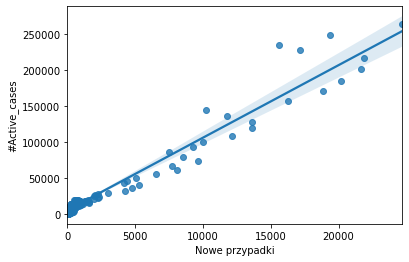

In [253]:
sns.regplot(x="Nowe przypadki", y="#Active_cases", data=data)

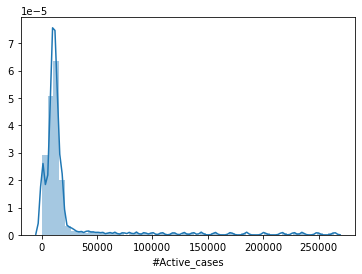

In [254]:
sns.distplot(data['#Active_cases'])